In [1]:
from texttable import Texttable
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier

## Stats Metadata

In [36]:
totalD,totalT,totalE,totalU,totalA = 12,12,12,4,6
totalAll = totalD+totalT+totalE+totalU

edxD, edxT, edxE, edxU, edxA = 7,7,3,2,2
edxTotal = edxD+edxT+edxE+edxU+edxA
edxA_cov = (edxA / totalA) * 100
edxD_cov = (edxD / totalD) * 100
edxT_cov = (edxT / totalT) * 100
edxE_cov = (edxE / totalE) * 100
edxU_cov = (edxU / totalU) * 100
edxAll_cov = (edxTotal / totalAll) * 100

tudD, tudT, tudE, tudU, tudA = 2,4,0,0,4
tudTotal = tudD + tudT + tudE + tudU + tudA
tudA_cov = (tudA / totalA) * 100
tudD_cov = (tudD / totalD) * 100
tudT_cov = (tudT / totalT) * 100
tudE_cov = (tudE / totalE) * 100
tudU_cov = (tudU / totalU) * 100
tudAll_cov = (tudTotal / totalAll) * 100

udemyD, udemyT, udemyE, udemyU, udemyA = 6,4,7,0,3
udemyTotal = udemyD + udemyT + udemyE + udemyU + udemyA
udemyA_cov = (udemyA / totalA) * 100
udemyD_cov = (udemyD / totalD) * 100
udemyT_cov = (udemyT / totalT) * 100
udemyE_cov = (udemyE / totalE) * 100
udemyU_cov = (udemyU / totalU) * 100
udemyAll_cov = (udemyTotal / totalAll) * 100

udacityD, udacityT, udacityE, udacityU, udacityA = 4,4,4,0,1
udacityTotal = udacityD + udacityT + udacityE + udacityU + udacityA
udacityA_cov = (udacityA / totalA) * 100
udacityD_cov = (udacityD / totalD) * 100
udacityT_cov = (udacityT / totalT) * 100
udacityE_cov = (udacityE / totalE) * 100
udacityU_cov = (udacityU / totalU) * 100
udacityAll_cov = (udacityTotal / totalAll) * 100

lyndaD, lyndaT, lyndaE, lyndaU, lyndaA = 5,3,4,0,4
lyndaTotal = lyndaD + lyndaT + lyndaE + lyndaU + lyndaA
lyndaA_cov = (lyndaA / totalA) * 100
lyndaD_cov = (lyndaD / totalD) * 100
lyndaT_cov = (lyndaT / totalT) * 100
lyndaE_cov = (lyndaE / totalE) * 100
lyndaU_cov = (lyndaU / totalU) * 100
lyndaAll_cov = (lyndaTotal / totalAll) * 100

coursD, coursT, coursE, coursU, coursA = 7,4,5,1,1
coursTotal = coursD + coursT + coursE + coursU + coursA
coursA_cov = (coursA / totalA) * 100
coursD_cov = (coursD / totalD) * 100
coursT_cov = (coursT / totalT) * 100
coursE_cov = (coursE / totalE) * 100
coursU_cov = (coursU / totalU) * 100
coursAll_cov = (coursTotal / totalAll) * 100

khanD, khanT, khanE, khanU, khanA = 4,7,2,4,3
khanTotal = khanD + khanT + khanE + khanU + khanA
khanA_cov = (khanA / totalA) * 100
khanD_cov = (khanD / totalD) * 100
khanT_cov = (khanT / totalT) * 100
khanE_cov = (khanE / totalE) * 100
khanU_cov = (khanU / totalU) * 100
khanAll_cov = (khanTotal / totalAll) * 100

table = Texttable()
table.set_cols_align(["c", "c", "c", "c", "c", "c", "c"])
table.set_cols_width([15,13,13,13,14,13,13])
table.add_rows([['Platform', 'Descriptional','Technical','Educational','Administrative','User-related','Average'],
                ['TUDelft Library','{0:.2f} %'.format(tudD_cov),'{0:.2f} %'.format(tudT_cov),'{0:.2f} %'.format(tudE_cov),'{0:.2f} %'.format(tudA_cov),'{0:.2f} %'.format(tudU_cov),'{0:.2f} %'.format(tudAll_cov)],
                ['eDX','{0:.2f} %'.format(edxD_cov),'{0:.2f} %'.format(edxT_cov),'{0:.2f} %'.format(edxE_cov),'{0:.2f} %'.format(edxA_cov),'{0:.2f} %'.format(edxU_cov),'{0:.2f} %'.format(edxAll_cov)],
                ['Udemy','{0:.2f} %'.format(udemyD_cov),'{0:.2f} %'.format(udemyT_cov),'{0:.2f} %'.format(udemyE_cov),'{0:.2f} %'.format(udemyA_cov),'{0:.2f} %'.format(udemyU_cov),'{0:.2f} %'.format(udemyAll_cov)],
                ['Udacity','{0:.2f} %'.format(udacityD_cov),'{0:.2f} %'.format(udacityT_cov),'{0:.2f} %'.format(udacityE_cov),'{0:.2f} %'.format(udacityA_cov),'{0:.2f} %'.format(udacityU_cov),'{0:.2f} %'.format(udacityAll_cov)],
                ['Lynda','{0:.2f} %'.format(lyndaD_cov),'{0:.2f} %'.format(lyndaT_cov),'{0:.2f} %'.format(lyndaE_cov),'{0:.2f} %'.format(lyndaA_cov),'{0:.2f} %'.format(lyndaU_cov),'{0:.2f} %'.format(lyndaAll_cov)],
                ['Coursera','{0:.2f} %'.format(coursD_cov),'{0:.2f} %'.format(coursT_cov),'{0:.2f} %'.format(coursE_cov),'{0:.2f} %'.format(coursA_cov),'{0:.2f} %'.format(coursU_cov),'{0:.2f} %'.format(coursAll_cov)],
                ['Khan Academy','{0:.2f} %'.format(khanD_cov),'{0:.2f} %'.format(khanT_cov),'{0:.2f} %'.format(khanE_cov),'{0:.2f} %'.format(khanA_cov),'{0:.2f} %'.format(khanU_cov),'{0:.2f} %'.format(khanAll_cov)],])
#print(table.draw())   

imagepath = r"C:\Users\ani\Desktop\plots"

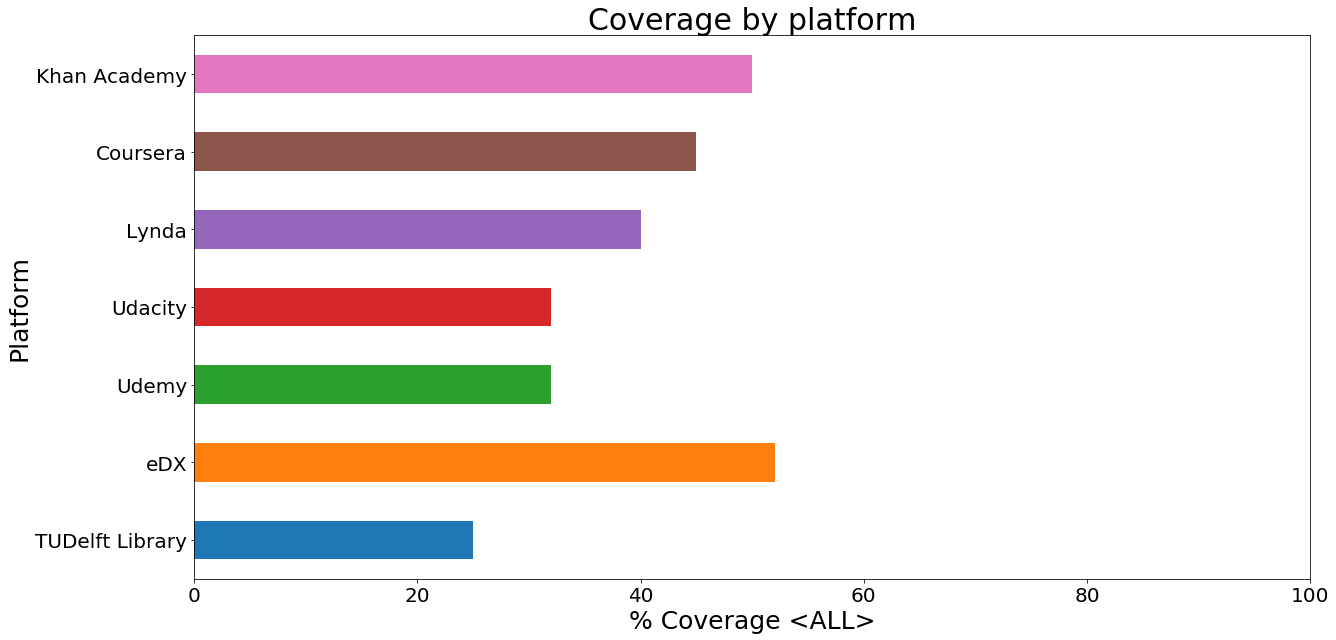

In [57]:
# All Platforms average
platform = ['TUDelft Library','eDX','Udemy','Udacity','Lynda','Coursera','Khan Academy']
data = [int(tudAll_cov),int(edxAll_cov),int(udacityAll_cov),int(udacityAll_cov),int(lyndaAll_cov),int(coursAll_cov),int(khanAll_cov)]

data_ser = pd.Series(data, index=platform)
data_ser.plot(x='coverage',kind='barh',xlim=(0,100),figsize=(20, 10))

plt.title('Coverage by platform', size = 30)
plt.xlabel('% Coverage <ALL>', size = 25)
plt.yticks(size = 20)
plt.xticks(size = 20)
plt.ylabel('Platform',size = 25)
plt.savefig(imagepath+'\\platformCoverage.png',bbox_inches="tight")

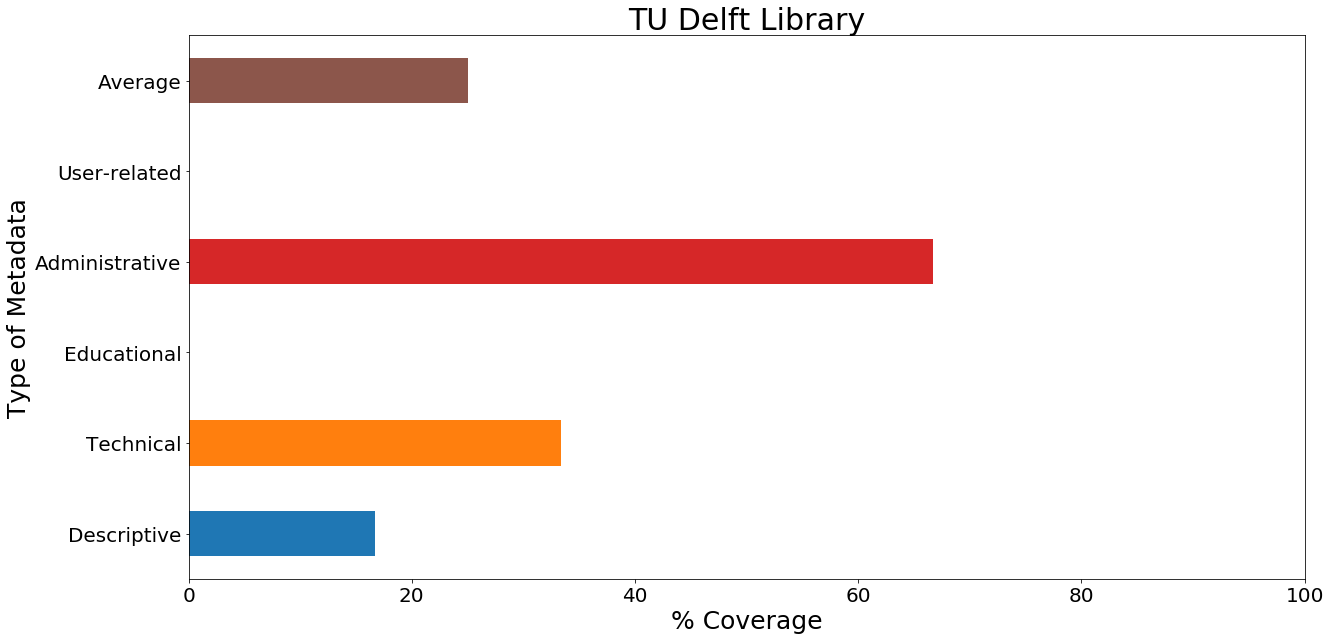

In [55]:
#TuDelft
mdtype = ['Descriptive','Technical','Educational','Administrative','User-related','Average']
data = [tudD_cov,tudT_cov,tudE_cov,tudA_cov,tudU_cov,tudAll_cov]

data_ser = pd.Series(data, index=mdtype)
data_ser.plot(x='coverage',kind='barh',xlim=(0,100),figsize=(20, 10),title="TU Delft Library")

plt.title('TU Delft Library', size = 30)
plt.xlabel('% Coverage', size = 25)
plt.yticks(size = 20)
plt.xticks(size = 20)
plt.ylabel('Type of Metadata',size = 25)
plt.savefig(imagepath+'\\tudTypes.png',bbox_inches="tight")

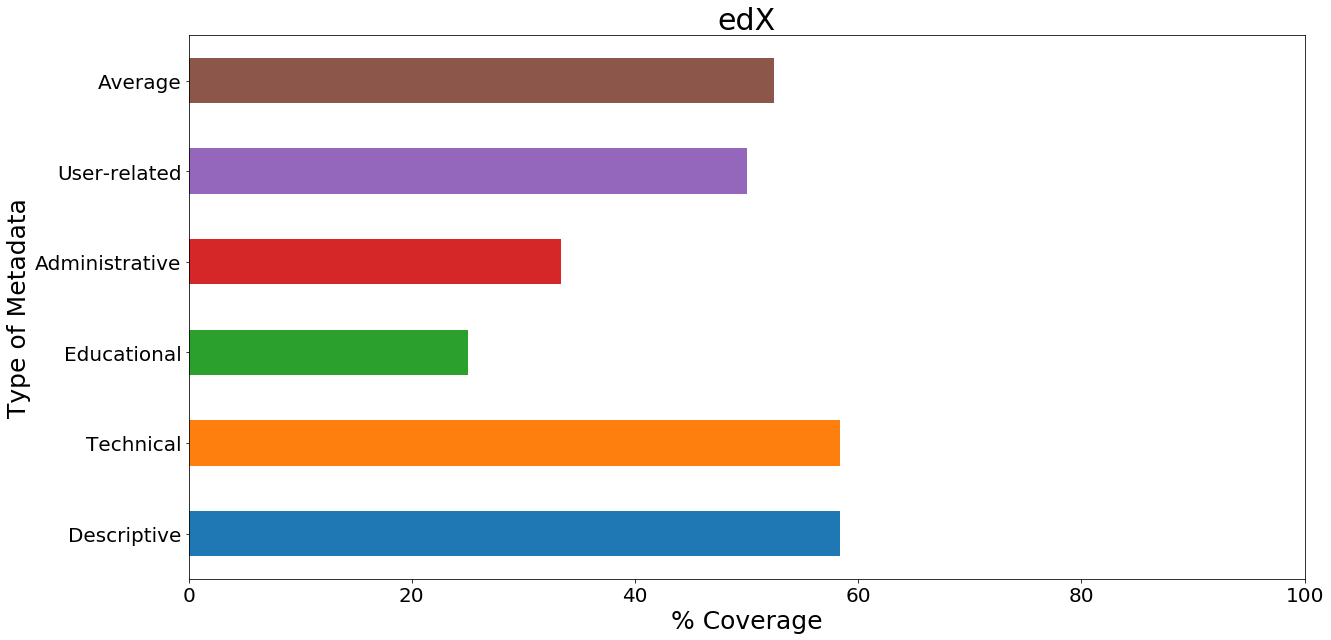

In [54]:
#edx
mdtype = ['Descriptive','Technical','Educational','Administrative','User-related','Average']
data = [edxD_cov,edxT_cov,edxE_cov,edxA_cov,edxU_cov,edxAll_cov]

data_ser = pd.Series(data, index=mdtype)
data_ser.plot(x='coverage',kind='barh',xlim=(0,100),figsize=(20, 10))


plt.title('edX', size = 30)
plt.xlabel('% Coverage', size = 25)
plt.yticks(size = 20)
plt.xticks(size = 20)
plt.ylabel('Type of Metadata',size = 25)
plt.savefig(imagepath+'\\edxTypes.png',bbox_inches="tight")

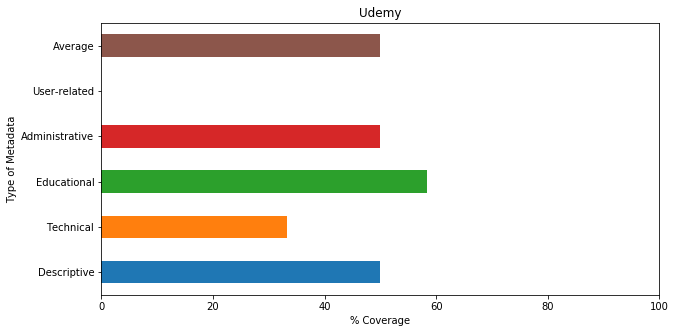

In [6]:
#udemy
mdtype = ['Descriptive','Technical','Educational','Administrative','User-related','Average']
data = [udemyD_cov,udemyT_cov,udemyE_cov,udemyA_cov,udemyU_cov,udemyAll_cov]

data_ser = pd.Series(data, index=mdtype)
data_ser.plot(x='coverage',kind='barh',xlim=(0,100),figsize=(10, 5),title="Udemy")
plt.xlabel('% Coverage')
plt.ylabel('Type of Metadata')
plt.savefig(imagepath+'\\udemyTypes.png',bbox_inches="tight")

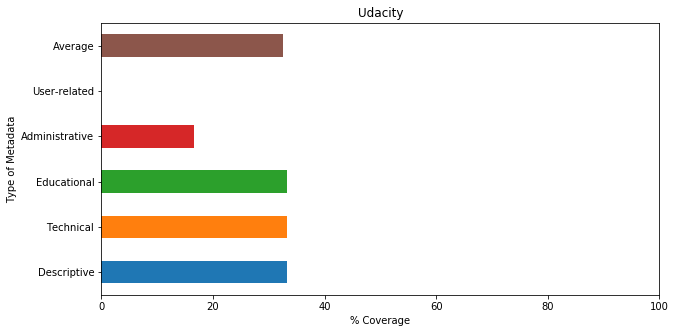

In [7]:
#Udacity
mdtype = ['Descriptive','Technical','Educational','Administrative','User-related','Average']
data = [udacityD_cov,udacityT_cov,udacityE_cov,udacityA_cov,udacityU_cov,udacityAll_cov]

data_ser = pd.Series(data, index=mdtype)
data_ser.plot(x='coverage',kind='barh',xlim=(0,100),figsize=(10, 5),title="Udacity")

plt.xlabel('% Coverage')
plt.ylabel('Type of Metadata')
plt.savefig(imagepath+'\\udacityTypes.png',bbox_inches="tight")

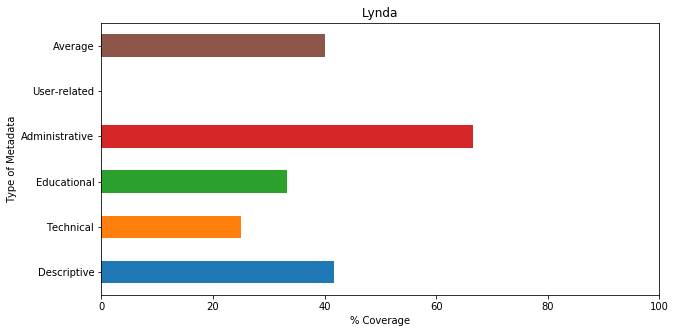

In [8]:
#Lynda
mdtype = ['Descriptive','Technical','Educational','Administrative','User-related','Average']
data = [lyndaD_cov,lyndaT_cov,lyndaE_cov,lyndaA_cov,lyndaU_cov,lyndaAll_cov]

data_ser = pd.Series(data, index=mdtype)
data_ser.plot(x='coverage',kind='barh',xlim=(0,100),figsize=(10, 5),title="Lynda")

plt.xlabel('% Coverage')
plt.ylabel('Type of Metadata')
plt.savefig(imagepath+'\\lyndaTypes.png',bbox_inches="tight")

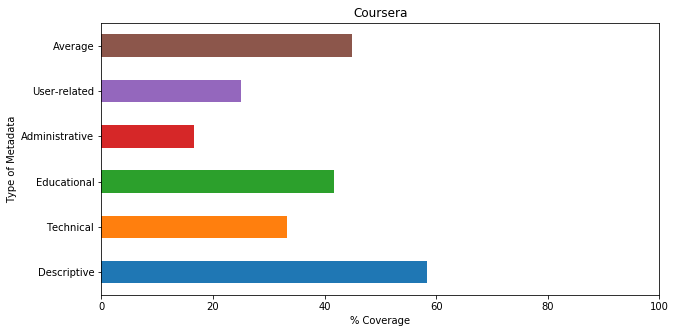

In [9]:
#Coursera
mdtype = ['Descriptive','Technical','Educational','Administrative','User-related','Average']
data = [coursD_cov,coursT_cov,coursE_cov,coursA_cov,coursU_cov,coursAll_cov]

data_ser = pd.Series(data, index=mdtype)
data_ser.plot(x='coverage',kind='barh',xlim=(0,100),figsize=(10, 5),title="Coursera")

plt.xlabel('% Coverage')
plt.ylabel('Type of Metadata')
plt.savefig(imagepath+'\\CourseraTypes.png',bbox_inches="tight")

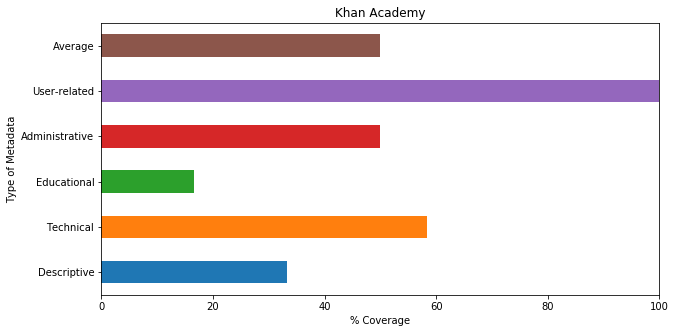

In [10]:
# Khan Academy
mdtype = ['Descriptive','Technical','Educational','Administrative','User-related','Average']
data = [khanD_cov,khanT_cov,khanE_cov,khanA_cov,khanU_cov,khanAll_cov]

data_ser = pd.Series(data, index=mdtype)
data_ser.plot(x='coverage',kind='barh',xlim=(0,100),figsize=(10, 5),title="Khan Academy")

plt.xlabel('% Coverage')
plt.ylabel('Type of Metadata')
plt.savefig(imagepath+'\\khanTypes.png',bbox_inches="tight")

### ----------------------------------------- by type -------------------------------------------

In [11]:
def avg(listOfItems):
    return sum(listOfItems, 0.0) / len(listOfItems)

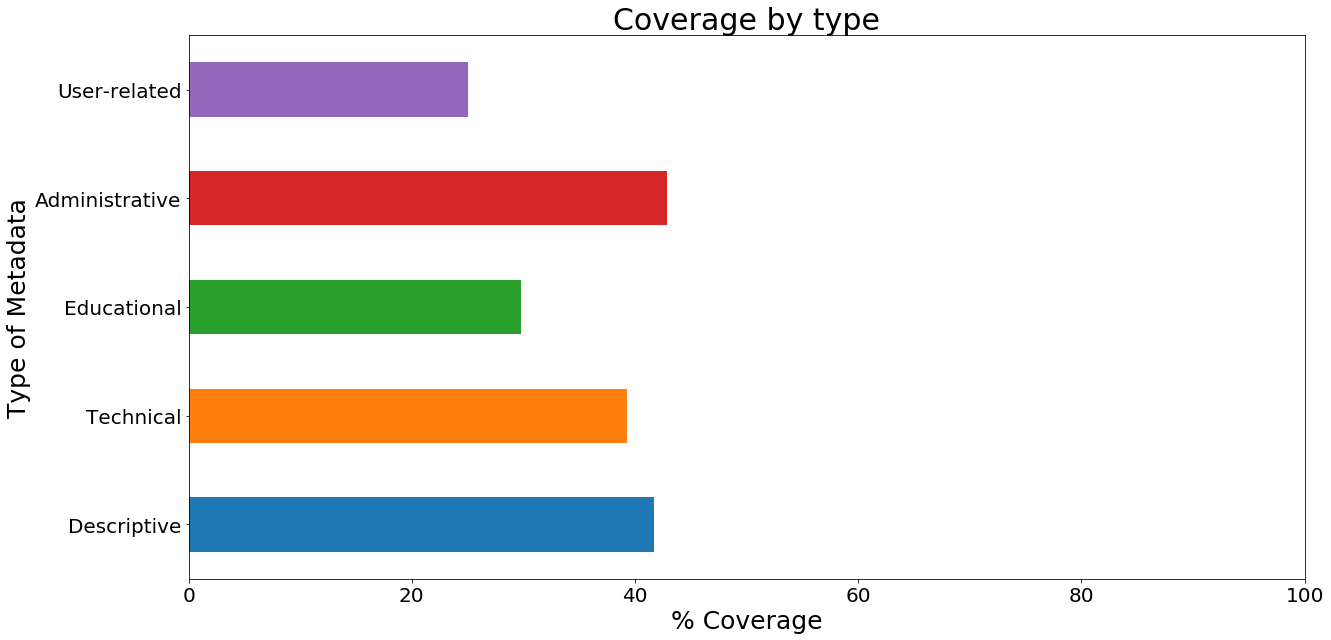

In [53]:
# Descriptive
mdtype = ['Descriptive','Technical','Educational','Administrative','User-related']
descr = (tudD_cov,edxD_cov,udacityD_cov,udemyD_cov,lyndaD_cov,coursD_cov,khanD_cov)
tech = (tudT_cov,edxT_cov,udacityT_cov,udemyT_cov,lyndaT_cov,coursT_cov,khanT_cov)
adm = (tudA_cov,edxA_cov,udacityA_cov,udemyA_cov,lyndaA_cov,coursA_cov,khanA_cov)
edu = (tudE_cov,edxE_cov,udacityE_cov,udemyE_cov,lyndaE_cov,coursE_cov,khanE_cov)
usr = (tudU_cov,edxU_cov,udacityU_cov,udemyU_cov,lyndaU_cov,coursU_cov,khanU_cov)
data = [avg(descr),avg(tech),avg(edu),avg(adm),avg(usr)]

data_ser = pd.Series(data, index=mdtype)
data_ser.plot(x='coverage',kind='barh',xlim=(0,100),figsize=(20, 10),title="Coverage by type")


plt.title('Coverage by type', size = 30)
plt.xlabel('% Coverage', size = 25)
plt.yticks(size = 20)
plt.xticks(size = 20)
plt.ylabel('Type of Metadata',size = 25)
plt.savefig(imagepath+'\\byTypeCovH.png',bbox_inches="tight")

## Stats - intent mining classification with RULES

In [13]:
CM_tp,CM_tn,CM_fp,CM_fn = 55,8036,42,249
CD_tp,CD_tn,CD_fp,CD_fn = 4740,1244,517,1881
AP_tp,AP_tn,AP_fp,AP_fn = 95,7316,748,223
SM_tp,SM_tn,SM_fp,SM_fn = 251,7216,596,319
EX_tp,EX_tn,EX_fp,EX_fn = 283,6761,1055,283

CM_prec, CM_rec, CM_f1, CM_acc = 0.57,0.18,0.27,0.97
CD_prec, CD_rec, CD_f1, CD_acc = 0.90,0.72,0.80,0.71
AP_prec, AP_rec, AP_f1, AP_acc = 0.11,0.30,0.16,0.88
SM_prec, SM_rec, SM_f1, SM_acc = 0.30,0.44,0.35,0.89
EX_prec, EX_rec, EX_f1, EX_acc = 0.21,0.50,0.30,0.84

prec_avg = (CM_prec+CD_prec+AP_prec+SM_prec+EX_prec) / 5
rec_avg = (CM_rec+CD_rec+AP_rec+SM_rec+EX_rec) / 5
f1_avg = (CM_f1+CD_f1+AP_f1+SM_f1+EX_f1) / 5
acc_avg = (CM_acc+CD_acc+AP_acc+SM_acc+EX_acc) / 5

table = Texttable()
table.set_cols_align(["c", "c", "c", "c", "c"])
table.set_cols_width([15,13,13,13,14])
table.add_rows([['', 'TP','TN','FP','FN'],
                ['CM',CM_tp,CM_tn,CM_fp,CM_fn],
                ['CD',CD_tp,CD_tn,CD_fp,CD_fn],
                ['AP',AP_tp,AP_tn,AP_fp,AP_fn],
                ['SM',SM_tp,SM_tn,SM_fp,SM_fn],
                ['EX',EX_tp,EX_tn,EX_fp,EX_fn]])
print(table.draw())   

imagepath = r"C:\Users\ani\Desktop\Course data Thesis\PLOTS"

+-----------------+---------------+---------------+---------------+----------------+
|                 |      TP       |      TN       |      FP       |       FN       |
+=================+===============+===============+===============+================+
|       CM        |      55       |     8036      |      42       |      249       |
+-----------------+---------------+---------------+---------------+----------------+
|       CD        |     4740      |     1244      |      517      |      1881      |
+-----------------+---------------+---------------+---------------+----------------+
|       AP        |      95       |     7316      |      748      |      223       |
+-----------------+---------------+---------------+---------------+----------------+
|       SM        |      251      |     7216      |      596      |      319       |
+-----------------+---------------+---------------+---------------+----------------+
|       EX        |      283      |     6761      |     1055     

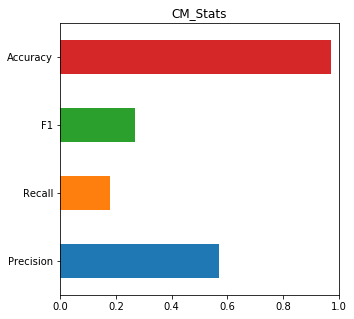

In [14]:
header = ['Precision','Recall','F1','Accuracy']
data = [CM_prec, CM_rec, CM_f1, CM_acc]

data_ser = pd.Series(data, index=header)
data_ser.plot(x='coverage',kind='barh',xlim=(0,1),figsize=(5, 5),title="CM_Stats")

plt.savefig(imagepath+'\\CM_Stats.png',bbox_inches="tight")

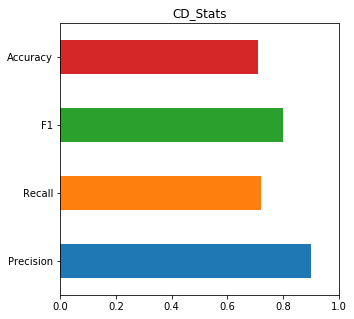

In [15]:
header = ['Precision','Recall','F1','Accuracy']
data = [CD_prec, CD_rec, CD_f1, CD_acc]

data_ser = pd.Series(data, index=header)
data_ser.plot(x='coverage',kind='barh',xlim=(0,1),figsize=(5, 5),title="CD_Stats")

plt.savefig(imagepath+'\\CD_Stats.png',bbox_inches="tight")

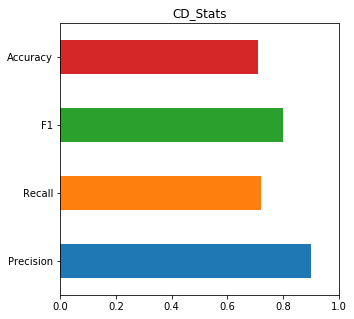

In [16]:
header = ['Precision','Recall','F1','Accuracy']
data = [CD_prec, CD_rec, CD_f1, CD_acc]

data_ser = pd.Series(data, index=header)
data_ser.plot(x='coverage',kind='barh',xlim=(0,1),figsize=(5, 5),title="CD_Stats")

plt.savefig(imagepath+'\\CD_Stats.png',bbox_inches="tight")

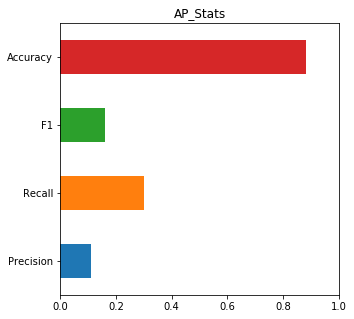

In [17]:
header = ['Precision','Recall','F1','Accuracy']
data = [AP_prec, AP_rec, AP_f1, AP_acc]

data_ser = pd.Series(data, index=header)
data_ser.plot(x='coverage',kind='barh',xlim=(0,1),figsize=(5, 5),title="AP_Stats")

plt.savefig(imagepath+'\\AP_Stats.png',bbox_inches="tight")

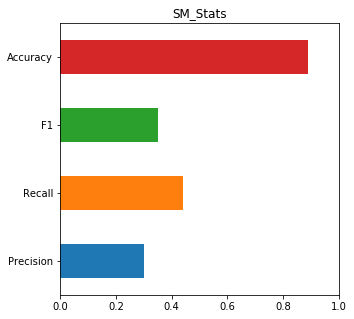

In [18]:
header = ['Precision','Recall','F1','Accuracy']
data = [SM_prec, SM_rec, SM_f1, SM_acc]

data_ser = pd.Series(data, index=header)
data_ser.plot(x='coverage',kind='barh',xlim=(0,1),figsize=(5, 5),title="SM_Stats")

plt.savefig(imagepath+'\\SM_Stats.png',bbox_inches="tight")

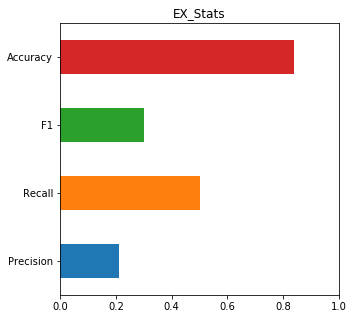

In [19]:
header = ['Precision','Recall','F1','Accuracy']
data = [EX_prec, EX_rec, EX_f1, EX_acc]

data_ser = pd.Series(data, index=header)
data_ser.plot(x='coverage',kind='barh',xlim=(0,1),figsize=(5, 5),title="EX_Stats")

plt.savefig(imagepath+'\\EX_Stats.png',bbox_inches="tight")

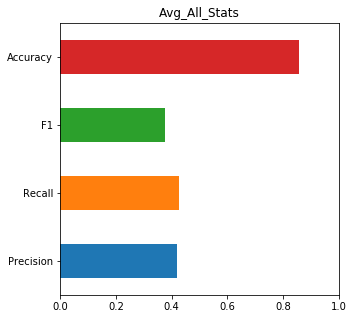

In [20]:
header = ['Precision','Recall','F1','Accuracy']
data = [prec_avg,rec_avg,f1_avg,acc_avg]

data_ser = pd.Series(data, index=header)
data_ser.plot(kind='barh',xlim=(0,1),figsize=(5, 5),title="Avg_All_Stats")

plt.savefig(imagepath+'\\Avg_All_Stats_square.png',bbox_inches="tight")

In [21]:
roc = roc_curve(CM_tp,pos_label="CM")

TypeError: roc_curve() missing 1 required positional argument: 'y_score'